# 大標本特性

If you come here without expecting Japanese, please click [Google translated version](https://translate.google.com/translate?hl=&sl=ja&tl=en&u=https%3A%2F%2Fpy4etrics.github.io%2F12_Asymptotics.html) in English or the language of your choice.

---

In [1]:
import numpy as np
from scipy.stats import norm, chi2, gaussian_kde, t, uniform
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from statsmodels.stats.stattools import jarque_bera, omni_normtest
import wooldridge
from numba import njit

# 警告メッセージを非表示
import warnings
warnings.filterwarnings("ignore")

ここでは大標本特性（Large sample properties）もしくは漸近的特性（Asymptotic properties）と呼ばれる特性について考察する。この特性は

**仮定６（正規性）が満たされない場合**

に重要となる推定量の性質である。

## 一致性（Consistency）

### 説明

不偏性は推定量の望ましい特性である。一方で，全ての推定量が不偏性を満たすわけではない。推定量について一般にいわれていることは，最低限**一致性（consistency）**
は必要だということである。一致性を記号で表現すると

$$
\underset{n\rightarrow\infty}{\text{plim}}\;\hat{\beta}=\beta
$$

となり，$\text{plim}$（probability limit）は確率収束を表している。この式の意味を理解するために$\hat{\beta}$は確率変数であることを思い出そう（シミュレーションの結果が毎回異なることを思い出そう）。不偏性と比較して直感的に説明することにする。
* ある母集団から標本の大きさ$n$のサンプルを$N$回復元抽出し（$N$は標本数），そのたびにOLS推定値$\hat{\beta}$を計算するとしよう。その平均が母集団のパラメータの値と等しいというのが不偏性（$\text{E}\left(\hat{\beta}\right)={\beta}$）である。
* 上の例での標本数は$N$であるため，$N$個のOLS推定量$\hat{\beta}$があり，その分布を考えることができる。GM仮定１〜４のもとで$N$が大きければ，連続分布関数をイメージすれば良い（例えば，単峰性の左右非対称の連続分布関数）。ここで標本数$N$を固定して，標本の大きさ$n$を増やしたとしよう。$n$の増加によりOLS推定量はより正確になり，推定値の分布はより分散が小さな形に変わっていく（分布の「幅が狭くなる」）。更に，$n\rightarrow\infty$とすると，推定値の分布は$\beta$の点に退化（一点に集中）することになる。即ち，標本の大きさが大きければ，OLS推定値$\hat{\beta}$の分布自体が真の値$\beta$に限りなく近づいていくのである。これが上の式の意味である。

```{figure} ./images/consistency.jpg
:align: center

推定値の分布：不偏性と一致性
```

この章ではシミュレーションを使って分布の収束過程を示すが，その前に定理としてまとめる。

---
**定理**

仮定１〜４（GM仮定）のもとで，OLS推定量は一致性を満たす。

---
この定理は，OLS推定量は不偏性と一致性を兼ね備えていることを示している。

更に，一致性だけに着目すれば仮定４を次の仮定４aに緩めることが可能となる。

仮定４a：$\text{E}(u)=0,\quad\text{Cov}(u,x)=0$

* 仮定４$\text{E}\left(u|x\right)=0$の意味をもう一度考えてみるために、線形もしくは非線形の任意の関数を$f(.)$とおこう。この関数を使い$u=f(x)$とすると、$u$と$x$には線形もしくは非線形の関係が存在することを意味している。$\text{E}\left(u|x\right)=0$は、$u=f(x)$の関係は存在し**ない**ことを意味する強い仮定になっている。この仮定を少し緩めたものが仮定４aである。任意の線形関数を$h(.)$とすると、$u$と$x$に線形の関係がある場合は$u=h(x)$となる（例えば、$u=1+2x$）。$\text{Cov}(u,x)=0$は$u=h(x)$の関係が存在しないということを意味しているが、必ずしも$u=f(x)$の関係が存在しないことを意味しない。更に付け加えると、$u$と$x$に非線形の関係がある場合，$\text{Cov}(u,x)=0$であっても，$\text{E}\left(u|x\right)\neq0$になりえるのである。即ち，仮定４は仮定４aを意味するが，仮定４aは仮定４を必ずしも意味しないのである。
* $\text{Cov}(u,x)=0$は$\text{E}(ux)=\text{E}(u)x=0$を意味する。

仮定４より緩い仮定４aのもとでは，少なくとも一致性を満たす推定量としてより多くの状況に対応できるようになる。

### シミュレーション：一致性

シミュレーションを使い一致性の分布収束を確かめる。仮定１〜４には誤差項の正規性や均一性は含まれていない。この点を捉えるために，誤差項は２つの異なる分布から確率的に発生すると仮定する。具体的には，確率$p$で誤差項は正規分布

$$u_N\sim\text{Normal(0,0.25)}$$

で発生し，$1-p$で

$$u_c=\frac{v-1}{\sqrt{2}},\qquad v\sim\chi^2(1)$$

が発生する。$\chi^2(1)$は自由度１のカイ二乗分布で，平均は1，標準偏差は$\sqrt{2}$。誤差項の確率密度関数は２つの確率密度関数の「加重平均」

$$
u = pu_N+(1-p)u_c
$$

となる。
* 正規分布の分散は0.5であり，カイ二乗分布の分散は1であるため仮定５は満たされない。（説明変数によって誤差項の分散が異なる。）
* また明らかに仮定６も満たされない。
* $\text{E}(u_N)=\text{E}(u_c)$であるため$\text{E}(u)=0$。

#### 誤差項のプロット

実際に，ここで仮定する誤差項はどのような分布になるか図示する。

ランダム変数の数

In [2]:
n = 10_000

このシミュレーションでは，`numpy`の関数`zeros()`を使い`for`ループで生成される誤差項の値を格納する`array`を用意する。`zeros()`は`0`が並ぶ`array`を作成する関数であり，一回のループ毎に`0`が誤差項の値と置換されることになる。１行・`n`列の`array`を設定する。

In [3]:
u = np.zeros(n)
u

array([0., 0., 0., ..., 0., 0., 0.])

正規分布の標準偏差の値。

In [4]:
u_sd = 0.5

In [5]:
for i in range(n):  # (1)
    
    prob = 0.05     # (2)
    dist_1 = norm.rvs(loc=0, scale=u_sd, size=1)     # (3)
    dist_2 = (chi2.rvs(1, size=1) - 1) / np.sqrt(2)  # (4)
    
    error = prob*(dist_1)+(1-prob)*(dist_2)          # (5)
    u[i] = error    # (6)

＜上のコードの説明＞
> 1. `n`回`for`ループを宣言。
> 2. `dist_1`の割合
> 3. 正規分布に従う１つのランダム変数を生成。
> 4. カイ二乗分布に従う１つのランダム変数を生成。
> 5. `error`が誤差項
> 6. この誤差項を`u[]`の`i`番目に代入。

＜コメント＞<br>
(5)では`dist_1`と`dist_2`の混合として`error`を生成しているが，`prob`で`dist_1`が発生し`1-prob`で`dist_2`が発生するように設定することも可能である。例えば，次のコード。
```
for i in range(n):

    random_var = {'normal':norm.rvs(loc=0, scale=u_sd, size=1),
                  'chi2':(chi2.rvs(1, size=1)-1)/np.sqrt(2)}
    dist = ['normal','chi2']

    choice = np.random.choice(dist, p=[0,1])
    error = random_var[choice]
    u[i] = error
```

`u`の最初の10の値を確認してみる。

In [6]:
u[:10]

array([ 0.077962  ,  0.01885482, -0.60264765,  0.36290293, -0.38680414,
       -0.5740974 ,  2.41063939, -0.5743331 , -0.36301266, -0.6734387 ])

次に`u`を図示してみよう。

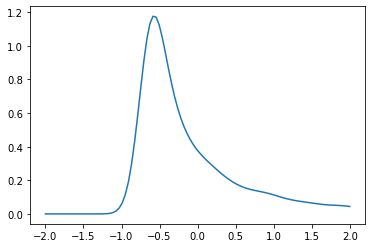

In [7]:
x=np.linspace(-2.0,2.0,100)  # 図を作成するために-2から２までの横軸の値を設定
kde_model=gaussian_kde(u)  # カーネル密度推定を設定
ufunc = kde_model(x)  # カーネル密度推定を使い誤差項の分布を推定
plt.plot(x, ufunc)  # 誤差項の分布をプロット
pass

確認のために、生成された`n`個のランダム変数（誤差項）の平均を計算してみる。

In [8]:
u.mean()

-0.009649052493757788

#### 一致性

＜シミュレーションの内容＞
* 母集団のパラメータを決める。
* 単回帰分析

    $$ y=\beta_0 + \beta_1 x + u$$
    
* 標本の大きさ$n=5,\;10,\;100,\;500$を考える。
* それぞれ10,000回推定し$\hat{\beta}_1$（10,000個）の分布を比べる。

母集団のパラメータ

In [9]:
b0 = 1  # 定数項
b1 = 0.5  # 説明変数の係数

標本数（シミュレーションの回数）

In [10]:
N = 10_000

シミュレーションをおこなう関数を定義する。
* 引数：標本の大きさ`n`
* 返り値：`b1`の推定値の`numpy`の`array`

In [11]:
@njit  # 計算の高速化
def sim_consistency(n):
    
    b1_arr = np.zeros(N)  # b1の推定値を格納するarray

    for i in range(N):  #  forループで N回シミュレーション
        
        x = np.random.normal(loc=4, scale=0.5, size=n)  # 説明変数
        
        # 残差の生成（上で説明したもの）
        u = np.zeros(n)
        
        for j in range(n):
            prob = 0.05  # 正規分布の確率
            dist_1 = np.random.normal(loc=0, scale=u_sd)
            dist_2 = (np.random.chisquare(1) - 1) / np.sqrt(2)
            error = prob*(dist_1)+(1-prob)*(dist_2)
            u[j] = error
            
        y = b0 + b1 * x + u  # yの抽出
        
        var_cov = np.cov(y,x)  # 分散共分散行列
        cov_yx = var_cov[0,1]  # 共分散
        var_y = var_cov[0,0]  # yの分散
        var_x = var_cov[1,1]  # xの分散        
        b1hat = cov_yx / var_x  # スロープ係数       
        b1_arr[i] = b1hat  # スロープ係数を b1_arrに格納

    return b1_arr   # 推定値のリストを返す

関数`sim_consistency()`を使い$n=30,\;100,\;250,\;500$の４パターンのシミュレーションをおこなうが、その際、次のようなコードを書くことも可能である。

```
# n=30のシミュレーション
sim_30 = sim_consistency(30)

# n=100のシミュレーション
sim_100 = sim_consistency(100)

# n=250のシミュレーション
sim_250 = sim_consistency(250)

# n=500のシミュレーション
sim_500 = sim_consistency(500)
```
もちろん，この方法でも問題はないが，パターンが増えると書く行も増えていく。別の方法として辞書を使う方法を紹介する。`n`の値である`30`や`100`をキーに設定し，値にシミュレーションの結果を格納する方法である。

In [12]:
data_consistency = {}  # 空の辞書の作成

for i in [30,100,250,500]:
    data_consistency[str(i)] = sim_consistency(i)

最後の行の右辺は`sim_consistency()`の返り値である`array`であり，それをキー`'30'`や`'100'`とのペアにに設定し，それらから構成される辞書`data_consistency`を作成している。イメージとしては次のような辞書となっている。
```
{'30':sim_consistency(30),'100':sim_consistency(100),....}
```
シミュレーションの結果にアクセスするにはキーを使う。例えば，`sim_consistency(30)`の結果にアクセスする場合は

In [13]:
data_consistency['30']

array([0.8740006 , 0.68675253, 0.40865192, ..., 1.0138836 , 0.69621919,
       0.86487044])

とする。次に図をプロットしよう。

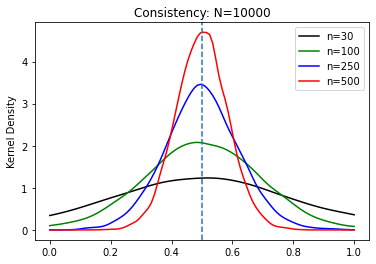

In [14]:
# 図を作成するために横軸の値を設定
xx=np.linspace(0.0,1.0,100)

# n = 30
kde_model_30=gaussian_kde(data_consistency['30'])  # カーネル密度推定を使いOLS推定量の分布を推定
plt.plot(xx, kde_model_30(xx), 'k', label='n=30')  # OLS推定量の分布プロット

# n = 100
kde_model_100=gaussian_kde(data_consistency['100'])
plt.plot(xx, kde_model_100(xx), 'g', label='n=100')

# n = 250
kde_model_250=gaussian_kde(data_consistency['250'])
plt.plot(xx, kde_model_250(xx), 'b', label='n=250')

# n = 500
kde_model_500=gaussian_kde(data_consistency['500'])
plt.plot(xx, kde_model_500(xx), 'r', label='n=500')


# 母集団のパラメータの値に縦の線
plt.axvline(x=b1,linestyle='dashed')
plt.legend() # 凡例
plt.ylabel('Kernel Density')
plt.title('Consistency: N={0}'.format(N))
pass

上のコードには同じような行が複数あり，単純な間違いの可能性が高くなる。。`for`ループを使うとよりコンパクトに書くことが可能となり，間違いも少なくなる。

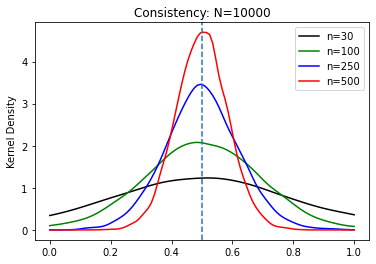

In [15]:
# OLS推定量のリスト
b1hat_list = [data_consistency['30'],data_consistency['100'],data_consistency['250'],data_consistency['500']]

# 色のリスト
color_list = ['k', 'g', 'b', 'r']

# ラベルのリスト
label_list = [30, 100, 250, 500]

#　横軸
xx=np.linspace(0.0,1.0,100)

#　下の説明（１）を参照 
for (b, c, l) in zip(b1hat_list, color_list, label_list):
    kde_model=gaussian_kde(b)
    plt.plot(xx, kde_model(xx), c, label='n={}'.format(l))  # 下の説明（２）

plt.axvline(x=b1,linestyle='dashed')
plt.ylabel('Kernel Density')
plt.title('Consistency: N={}'.format(N))  # 下の説明（２）
plt.legend()
pass

＜コードの説明＞
> * (1) `zip()`はループによく使われる便利な関数である。以下の単純な`for`ループ
>    ```
>    for i in range(5):
>        print('Hi')
>    ```
>    にはループ・インデックスが`i`の１種類しかない。しかし複数のループ・インデックスを同時に使えると便利な場合があり，その際使うのが`zip()`である。使い方は，`zip()`の中に複数のリスト（例えば，`b1hat_list`, `color_list`, `label_list`）を入れ，`in`の前にタプルとして同じ順番にループ・インデックスを並べる。
> * (2) `'n={}'.format(l)`について。文字列は`''`で挟むが，その中に定義した変数の値を書きたい場合がある。直接書いても構わないが，値が変更される度に書き直すのは面倒である。`'<文字列>{}'.format(<変数>)`を使うと変数の値が変わっても自動的に変更される。使い方は，`''`の入れたい箇所に`{}`を入れ，その後に`.format(<変数>)`を書く。もちろん`f-string`を使い次のように書いても同じ結果となる。
    ```
    f'n={l}'
    ```

---
図から$n$が増加すると分布の分散が小さくなるのが視覚的に確認できる。これが一致性である。`n`の増加により推定量$\hat{\beta}_1$の正確性が増すことが理解できる。また4つの分布は真の値$b_1=0.5$を中心に左右対象であることもわかる。即ち，推定量$\hat{\beta}_1$は不偏性も満たしていることがわかる。

## 標本の大きさによる違い

### 小標本特性

標本の大きさが $n>k+1$ であるかぎりどのような値（小さくても大きくても）であっても
1. 仮定１〜４（GM仮定）の下でOLS推定量の**不偏性**は成立する。
2. 仮定１〜５（CLM仮定）の下でOLS推定量の**B.L.U.E**も成立する。
3. 仮定１〜６の下で，説明変数の値を所与とすると，OLS推定量$\hat{\beta}_j$は正規分布に従う。これにより$t$検定と$F$検定は**有効**となる。

小標本特性３が成立する上で特に重要なのは仮定６（誤差項の正規性）である。標本の大きさ（$n$）が小さくても（もちろん，大きくても），仮定６によりOLS推定量は正規分布に従い$t$検定と$F$検定は有効である。換言すると，仮定６が成立しなければ$t$検定と$F$検定は無効になってしまう。そこで重要な役割を果たすのが「大標本特性」といわれるものである。

### 大標本特性

仮定６が満たされなくとも（仮定１〜５のもとで）標本の大きさが十分に大きい場合（$n\rightarrow\infty$），OLS推定量 $\hat{\beta}_j$は正規分布に従う。

この特性により標本数が十分に大きい場合，$t$値と$F$値の分布はそれぞれ$t$分布と$F$分布で**近似**できる。この意味で$t$検定と$F$検定は有効となる。ではどれだけ$n$が大きければ大標本特性のもとで$t$検定と$F$検定が有効となるのであろう。残念なことに決まったルールはない。**30**とも言われるが，全てのケースでそうとは言いがたい。

## シミュレーション：大標本特性と$t$値の分布

### 説明

大標本特性を確認するためにシミュレーションをおこなうが、ここでは$t$値の分布を考える。


＜シミュレーションの内容＞

* 単回帰分析を考える。

    $$ y=\beta_0 + \beta_1 x + u$$
    
* ２つのケースに分ける。
    1. $u$が正規性を満たしている場合
    2. $u$が正規性を満たしていない場合
* それぞれのケースで標本の大きさ$n=5,10,30,100$の４つのケースを考える（即ち，計8回パターン）。
* １パターンにつき$N$回の推定をおこない，次の統計量を$N$個生成する。
    
    $$
    q_1=\frac{\hat{\beta}_1-\beta_1}{\text{se}\left(\hat{\beta}_1\right)}
    $$

  $u$が正規性を満たしている場合，$q_1$は$t_{n-2}$に従って分布する。
* $q_1$の分布と対応する$t_{n-2}$分布を比べる。

---
シミュレーションの目的は次の２つの点を確認することである。

**（小標本特性）**
仮定６が成り立つ場合，$q_1$の値は自由度$n-2$の$t$分布に従う。

**（大標本特性）**
仮定６が成り立たない場合，$n$が小さいと$q_1$値は$t$分布に従わないが，$n$が十分に大きいと自由度$n-2$の$t$分布に従う。

### 誤差項の正規性が満たされる場合

母集団のパラメータは一致性のシミュレーションと同じ値を使う。

In [16]:
b0 = 1  # 定数項
b1 = 0.5  # 説明変数の係数

誤差項は標準正規分布に従うと仮定する。`u_sd`は誤差項の標準偏差。

In [17]:
u_sd = 1

標本数（シミュレーションの回数）は次の値とする。

In [18]:
N = 100_000

シミュレーションの関数を作成する。

（注意）
* 小標本特性３に「説明変数の値を所与とすると」とあり，これを捉えるために以下のコードでは`for`ループの外に`x`を生成するコードを置く。こうすることにより，$x$を一度ランダム抽出し固定し，`N`回のシミュレーションに使用する。$x$は固定されているが，$u$と$y$は毎回変化することになる。
* シミュレーションの高速化のために`numpy`の関数を使い「手計算」で$q_1$の分布を計算する。

In [19]:
@njit  # 関数の高速化
def sim_norm(n):  # n=標本の大きさ
    
    q1_arr = np.zeros(N)  # q1を入れる空array
    
    x = np.random.normal(loc=4, scale=1, size=n)  # N回の推定に同じ説明変数を使う

    for j in range(N):  # N 回のループ
        
        u = np.random.normal(loc=0, scale=u_sd, size=n)  # 誤差項
        y = b0 + b1 * x + u  # 説明変数
        
        var_cov = np.cov(y,x)  # 分散共分散行列
        cov_yx = var_cov[0,1]  # 共分散
        var_y = var_cov[0,0]  # yの分散
        var_x = var_cov[1,1]  # xの分散        
        
        b1hat = cov_yx / var_x  # b1の推定値
        b0hat = np.mean(y)-b1hat*np.mean(x)  #b0の推定値
        yhat = b0hat + b1hat*x  # yの予測値
        uhat = y - yhat  # 残差
        
        rss = np.sum(uhat**2)  # 残差平方和
        sigma2 = rss/(n-2)  # 回帰の残差（不偏）分散 
        ser = np.sqrt(sigma2)  # 回帰の標準誤差
        
        b1se = ser/np.sqrt(n*np.var(x))  # b1の標準誤差
        
        q1 = (b1hat - b1)/b1se  # q1の値
    
        q1_arr[j] = q1  # t値をarrayに追加
    
    return q1_arr  # 返り値の設定

$n=5,\;10,\;30,\;100$のシミュレーション

In [20]:
q1_norm = {}  # 空の辞書の作成

for i in [5,10,30,100]:
    q1_norm[str(i)] = sim_norm(i)

`plot`するための関数を用意する。

In [21]:
def plot_dist(n, q1_arr):  # n=標本の大きさ，q1_arr=q1値のarray
    
    xx=np.linspace(-3,3,num=100)  # 図を作成するために横軸の値を設定

    kde_model=gaussian_kde(q1_arr)  # カーネル密度推定を使いt値の分布を推定
    
    t_dist = t.pdf(xx,df=n-2)  # 同じ自由度のt分布
    
    plt.plot(xx, kde_model(xx), 'g-')  # t値の分布プロット
    plt.plot(xx, t_dist,'b:')  # t分布
    plt.ylabel('Kernel Density')  # 縦軸のラベル
    plt.title('n = {0}'.format(n))  # タイトル

４つの図を並べて表示してみよう。
* 実線：$q_1$値の分布（カーネル密度推定）
* 点線：自由度`n-2`の$t$分布

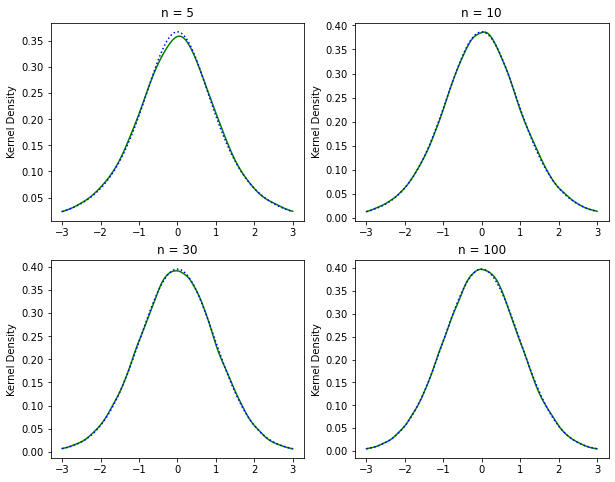

In [22]:
plt.figure(figsize=(10, 8))

# n = 5
plt.subplot(221)
plot_dist(5, q1_norm['5'])

# n = 10
plt.subplot(222)
plot_dist(10, q1_norm['10'])

# n = 30
plt.subplot(223)
plot_dist(30, q1_norm['30'])

# n = 100
plt.subplot(224)
plot_dist(100, q1_norm['100'])
pass

（結果：小標本特性）

実線と点線は殆ど同じ。即ち，$q_1$は$t_{n-2}$分布に従っている。

### 誤差項の正規性が満たされない場合

上のシミュレーションと違う点は，$u$は次の分布関数から抽出されると仮定する点である。

$$
u=\frac{v-1}{\sqrt{2}},\qquad v\sim\chi^2(1)
$$

これは一致性のシミュレーションで使った分布関数と同じである。これにより仮定６が満たされない。

この仮定を導入するために，上で定義した`sim_norm()`関数の代わりに`sim_non_normal()`を定義する。`sim_normal()`と異なるのは次の一行だけである。
```
u = (np.random.chisquare(1, size=n) - 1) / np.sqrt(2)

```

In [23]:
@njit  # 関数の高速化
def sim_non_norm(n):  # n=標本の大きさ
    
    q1_arr = np.zeros(N)  # q1を入れる空array
    
    x = np.random.normal(loc=4, scale=1, size=n)  # N回の推定に同じ説明変数を使う

    for j in range(N):  # N 回のループ
        
        ###### 非正規分布の誤差項（次の行だけが異なる）######
        u = (np.random.chisquare(1, size=n) - 1) / np.sqrt(2)
        
        y = b0 + b1 * x + u  # 説明変数
        
        var_cov = np.cov(y,x)  # 分散共分散行列
        cov_yx = var_cov[0,1]  # 共分散
        var_y = var_cov[0,0]  # yの分散
        var_x = var_cov[1,1]  # xの分散        
        
        b1hat = cov_yx / var_x  # b1の推定値
        b0hat = np.mean(y)-b1hat*np.mean(x)  #b0の推定値
        yhat = b0hat + b1hat*x  # yの予測値
        uhat = y - yhat  # 残差
        
        rss = np.sum(uhat**2)  # 残差平方和
        sigma2 = rss/(n-2)  # 回帰の残差（不偏）分散 
        ser = np.sqrt(sigma2)  # 回帰の標準誤差
        
        b1se = ser/np.sqrt(n*np.var(x))  # b1の標準誤差
        
        q1 = (b1hat - b1)/b1se  # q1の値
    
        q1_arr[j] = q1  # t値をarrayに追加
    
    return q1_arr  # 返り値の設定

$n=5,\;10,\;30,\;100$のシミュレーション

In [24]:
q1_non_norm = {}  # 空の辞書の作成

for i in [5,10,30,100]:
    q1_non_norm[str(i)] = sim_non_norm(i)

４つの図を並べて表示してみる。
* 実線：$q_1$の分布（カーネル密度推定）
* 点線：自由度$n-2$の$t$分布

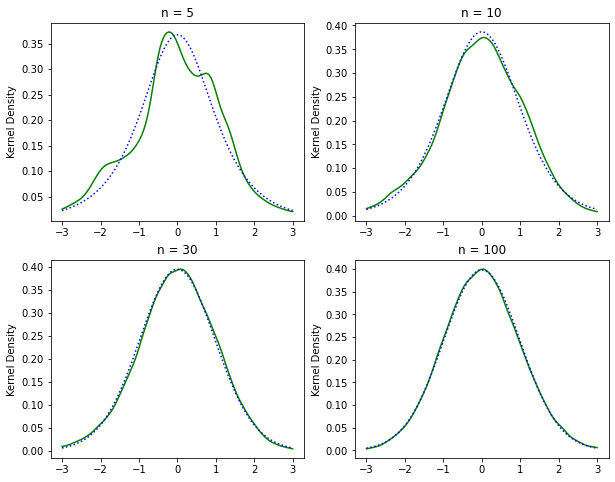

In [25]:
plt.figure(figsize=(10, 8))

# n = 5
plt.subplot(221)
plot_dist(5, q1_non_norm['5'])

# n = 10
plt.subplot(222)
plot_dist(10, q1_non_norm['10'])

# n = 30
plt.subplot(223)
plot_dist(30, q1_non_norm['30'])

# n = 100
plt.subplot(224)
plot_dist(100, q1_non_norm['100'])
pass

（結果：大標本特性）

標本の大きさが小さい場合（$n=5,10$），$q_1$の分布は$t_{n-2}$分布から乖離している。一方で，標本の大きさが大きくなるにつれて$q_1$の分布は$t_{n-2}$分布に近づいていくのが確認できる。これが「大標本特性」である。標本の大きさが十分に大きい場合，$t$検定は有効であることが確認できる。同じことが$F$検定にも当てはまる。

このシミュレーションの結果次第では，$n=30$でも概ね$t_{n-2}$分布に近くなる場合がある。しかし同じ結果がどの場合にも当てはまるわけではなく，シミュレーションの設定が変わると異なる結果になることを覚えておこう。

## 正規性の確認

### qqプロット

`qq`プロットの`q`は`quantile`（分位数）のこと。横軸に正規分布の理論値を，縦軸にはデータの値を並べる。データが正規分布に従っている場合，データは45度線付近に分布することになる。

以下では`statsmodels`の`qqplot`を使って説明する。（`lmdiag`パッケージでもよい）

**正規分布**から生成したデータのケース。
* 赤い線は45度線
* オプション`line='45'`：45度線を指定
* オプション`fit=True`：データの平均と標準偏差を使って標準化する

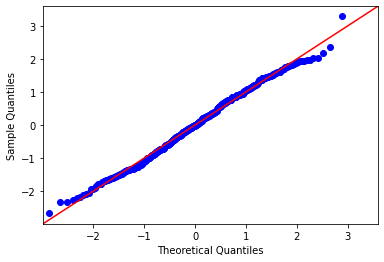

In [26]:
data_norm = norm.rvs(scale=5, size=500)
qqplot(data_norm, line='45', fit=True)
pass

**一様分布**から生成したデータの場合。45度線から乖離しているのが分かる。

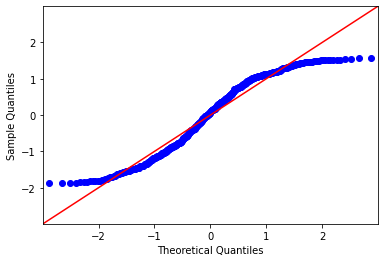

In [27]:
data_uniform = uniform.rvs(size=500)
qqplot(data_uniform, line='45', fit=True)
pass

`wooldridge`パッケージにある`wage1`のデータを使ってみる。

誤差項は`res_wage`の属性である`.resid`から取得できるので，それを`qqplot()`に使う。

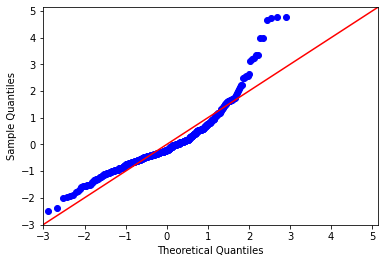

In [28]:
wage1 = wooldridge.data('wage1')
formula_wage = 'wage ~ educ + exper+ tenure'
res_wage = ols(formula_wage, data=wage1).fit()
qqplot(res_wage.resid, line='45',fit=True)
pass

被説明変数の`wage`に対数を取ると、こちらの方が当てはまりが良いことが分かる。

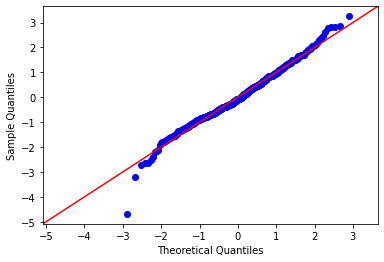

In [29]:
wage1 = wooldridge.data('wage1')
formula_wage_log = 'np.log(wage) ~ educ + exper+ tenure'
res_wage_log = ols(formula_wage_log, data=wage1).fit()
qqplot(res_wage_log.resid, line='45',fit=True)
pass

### Jarque-Bera検定

分布の正規性の確認によく使われる検定を紹介する。

$\text{H}_0$：正規分布である

$\text{H}_A$：$\text{H}_0$は成立しない

正規性の判断には分布の以下の特徴に基づいている。
* 歪度（わいど;Skewness）：分布の左右の偏り
* 尖度（せんど;Kurtosis）：分布の「頂上」のとがり具合

`statsmodels`のサブパッケージの一部に含まれている。

上で使った`data_norm`で試してみよう。

In [30]:
jarque_bera(data_norm)

(5.147978936236929,
 0.07623081756072796,
 -0.007914214816000503,
 2.503157520178923)

返り値

1. JB検定統計量
2. JBの$p$値
3. 歪度の推定値（正規分布の場合は0）
4. 尖度の推定値（正規分布の場合には3になるように設定されている）

この例では$p$値が高いため$\text{H}_0$は棄却できない。

---
次に`data_uniform`を試してみよう。

$p$値は非常に小さいため，1%有意水準でも$\text{H}_0$を棄却できる。

In [31]:
jarque_bera(data_uniform)

(34.10572850802391,
 3.9267671921321584e-08,
 -0.18104416347035493,
 1.7728215240322924)

---
上で行った２つの回帰分析の結果を検定してみよう。

In [32]:
jarque_bera(res_wage.resid)

(650.8075112915243,
 4.774682881100647e-142,
 1.554801715308793,
 7.474930815416472)

In [33]:
jarque_bera(res_wage_log.resid)

(20.941231982373445,
 2.8357585677395426e-05,
 0.021232049159152486,
 3.9765706706813035)

---
JB検定の結果は，回帰分析の結果の`summary()`に含まれている。
* `Jarque-Bera (JB)`：JB検定統計量
* `Prob(JB)`：JBの$p$値

In [34]:
print(res_wage_log.summary().tables[2])

Omnibus:                       11.534   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.941
Skew:                           0.021   Prob(JB):                     2.84e-05
Kurtosis:                       3.977   Cond. No.                         135.


### Omnibus検定

正規性を確認するもう１つの検定を紹介する。

$\text{H}_0$：正規分布である

$\text{H}_A$：$\text{H}_0$は成立しない

BJ検定と同じように，正規性の判断には歪度（わいど;Skewness）と尖度（せんど;Kurtosis）に基づいている。

---
`statsmodels`のサブパッケージの一部に含まれている。

`data_norm`を使って試してみる。

＜返り値＞
* テスト統計量
* $p$値

In [35]:
omni_normtest(data_norm)

NormaltestResult(statistic=8.521611882111182, pvalue=0.014110925252127334)

$p$値は高いため，10%有意水準でも$\text{H}_0$を棄却できない。

---
次に`data_uniform`を試してみよう。

$p$値は非常に小さいため，1%有意水準でも$\text{H}_0$を棄却できる。

In [36]:
omni_normtest(data_uniform)

NormaltestResult(statistic=390.18384953070426, pvalue=1.8734996250942263e-85)

---
上で行った２つの回帰分析の結果を検定してみよう。

In [37]:
omni_normtest(res_wage.resid)

NormaltestResult(statistic=179.59717584393934, pvalue=1.0022331946711003e-39)

In [38]:
omni_normtest(res_wage_log.resid)

NormaltestResult(statistic=11.534386892183338, pvalue=0.0031285255800789316)

---
Omnibus検定の結果は，回帰分析の結果の`summary()`に含まれている。
* `Omnibus`：検定統計量
* `Prob(Omnibus)`：$p$値

In [39]:
print(res_wage_log.summary().tables[2])

Omnibus:                       11.534   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.941
Skew:                           0.021   Prob(JB):                     2.84e-05
Kurtosis:                       3.977   Cond. No.                         135.


## $LM$検定

大標本の場合，$F$検定の代わりに$LM$検定も使える。ここでは`crime1`のデータを使って$LM$検定について説明する。`wooldridge`パッケージの`crime1`データを使おう。

In [40]:
crime1 = wooldridge.data('crime1')
wooldridge.data('crime1', description=True)

name of dataset: crime1
no of variables: 16
no of observations: 2725

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| narr86   | # times arrested, 1986          |
| nfarr86  | # felony arrests, 1986          |
| nparr86  | # property crme arr., 1986      |
| pcnv     | proportion of prior convictions |
| avgsen   | avg sentence length, mos.       |
| tottime  | time in prison since 18 (mos.)  |
| ptime86  | mos. in prison during 1986      |
| qemp86   | # quarters employed, 1986       |
| inc86    | legal income, 1986, $100s       |
| durat    | recent unemp duration           |
| black    | =1 if black                     |
| hispan   | =1 if Hispanic                  |
| born60   | =1 if born in 1960              |
| pcnvsq   | pcnv^2                          |
| pt86sq   | ptime86^2                       |
| inc86sq  | inc86^2                         |
+----------+-------------------------

`crime1`は1972年に初めて逮捕された成人で構成されたデータセットである。このデータを使い刑罰の犯罪に対する抑止力を検証する。

被説明変数：
* `narr86`：1986年に逮捕された回数

説明変数
* `pcnv`：1986年以前に逮捕され起訴につながった比率（逮捕を所与とし，起訴される確率もしくは期待を表している）
* `ptime86`：1986年での服役期間（単位：月）（投獄による不自由さのコスト）
* `qemp86`：雇用（単位：４半期）
* `avgsen`：直近の懲役期間の平均（単位：月）
* `tottime`：18歳以降の服役期間（単位：月）

制約がない場合の推定

In [41]:
form_0 = 'narr86 ~ pcnv + ptime86 + qemp86 + avgsen + tottime'
res_0 = ols(form_0, data=crime1).fit()
res_0.params

Intercept    0.706061
pcnv        -0.151225
ptime86     -0.039259
qemp86      -0.103091
avgsen      -0.007049
tottime      0.012095
dtype: float64

仮説

`avgsen = tottime = 0`

仮説が正しい（制約がある）場合の推定

In [42]:
form_1 = 'narr86 ~ pcnv + ptime86 + qemp86'
res_1 = ols(form_1, data=crime1).fit()
res_1.params

Intercept    0.711772
pcnv        -0.149927
ptime86     -0.034420
qemp86      -0.104113
dtype: float64

---
$\text{H}_0$: `avgsen=tottime=0`

$\text{H}_A$: $\text{H}_0$は成立しない

---
`res_0`のメソッド`.compare_lm_test()`を使うと簡単に計算結果を表示できる。引き数は，仮説が正しい場合のOLS推定の結果`res_1`を使う。

In [43]:
res_0.compare_lm_test(res_1)

(4.070729461071173, 0.13063282803269938, 2.0)

返り値（左から）
* $LM$検定統計値
* $p$値
* 制限の数

有意水準5%で帰無仮説は棄却できない。